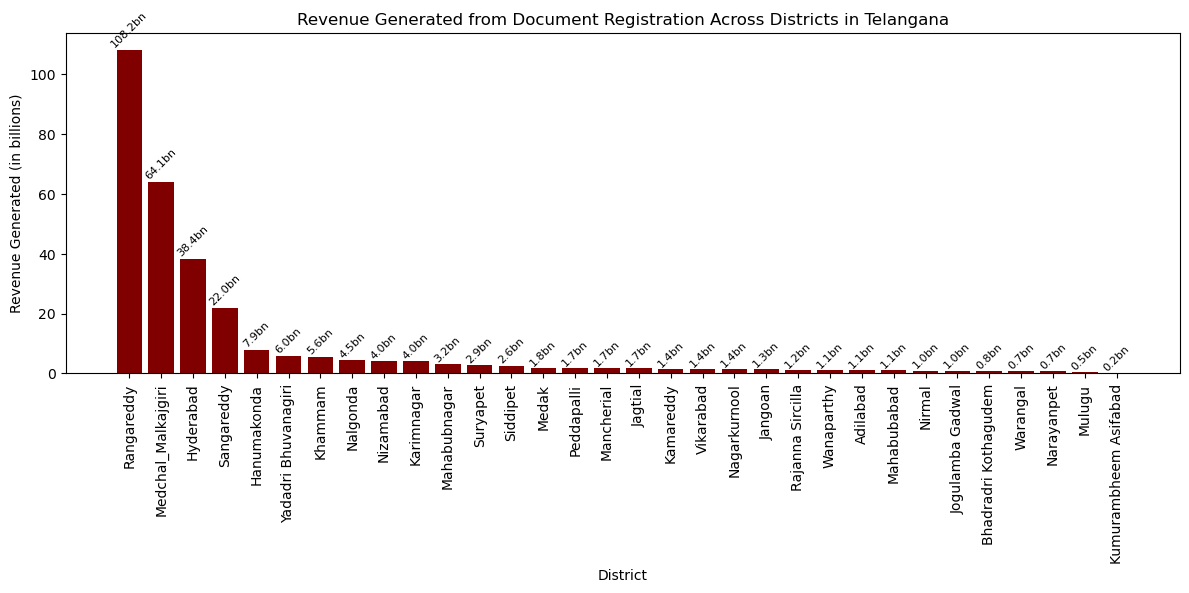

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Read district codes and names
districts_df = pd.read_csv("dim_districts.csv")

# Read revenue data
revenue_df = pd.read_csv("fact_stamps.csv")

# Merge district names with revenue data
revenue_merged_df = pd.merge(revenue_df, districts_df, on="dist_code")

# Calculate total revenue generated per district
revenue_by_district = revenue_merged_df.groupby("district")["documents_registered_rev"].sum().reset_index()

# Sort districts by revenue generated
revenue_by_district_sorted = revenue_by_district.sort_values(by="documents_registered_rev", ascending=False)

# Convert revenue to billions
revenue_by_district_sorted['revenue_in_bn'] = revenue_by_district_sorted['documents_registered_rev'] / 10**9

# Visualize revenue generated across districts
plt.figure(figsize=(12, 6))
bars = plt.bar(revenue_by_district_sorted['district'], revenue_by_district_sorted['revenue_in_bn'], color='maroon')
plt.title('Revenue Generated from Document Registration Across Districts in Telangana')
plt.xlabel('District')
plt.ylabel('Revenue Generated (in billions)')
plt.xticks(rotation=90)

# Annotate each bar with its revenue value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f"{yval:.1f}bn", ha='center', va='bottom', fontsize=8, rotation=45)

plt.tight_layout()
plt.show()



In [40]:
print("Columns of dim_districts_df:")
print(dim_districts_df.columns)

print("\nColumns of fact_stamps_df:")
print(fact_stamps_df.columns)


Columns of dim_districts_df:
Index(['dist_code,district'], dtype='object')

Columns of fact_stamps_df:
Index(['dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev'], dtype='object')


In [41]:
# Split the 'dist_code,district' column into two separate columns
dim_districts_df[['dist_code', 'district']] = dim_districts_df['dist_code,district'].str.split(',', expand=True)

# Now drop the 'dist_code,district' column
dim_districts_df.drop(columns=['dist_code,district'], inplace=True)

# Split the 'dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev' column into multiple columns
fact_stamps_df[['dist_code', 'month', 'documents_registered_cnt', 'documents_registered_rev', 'estamps_challans_cnt', 'estamps_challans_rev']] = fact_stamps_df['dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev'].str.split(',', expand=True)

# Now drop the 'dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev' column
fact_stamps_df.drop(columns=['dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev'], inplace=True)

# Display the first few rows of both datasets after splitting and renaming columns
print("First few rows of dim_districts_df:")
print(dim_districts_df.head())

print("\nFirst few rows of fact_stamps_df:")
print(fact_stamps_df.head())


First few rows of dim_districts_df:
  dist_code              district
0      19_1              Adilabad
1      22_2  Bhadradri Kothagudem
2      21_1           Hanumakonda
3      16_1             Hyderabad
4      20_2               Jagtial

First few rows of fact_stamps_df:
  dist_code       month documents_registered_cnt documents_registered_rev  \
0      14_1  2019-04-01                     4533                 59236363   
1      17_3  2019-04-01                     4151                 41508762   
2      20_3  2019-04-01                     2116                 23674170   
3      21_5  2019-04-01                     1089                 15915285   
4      23_1  2019-04-01                     6133                 82593256   

  estamps_challans_cnt estamps_challans_rev  
0                    0                    0  
1                    0                    0  
2                    0                    0  
3                    0                    0  
4                    0          

In [42]:
# Merge the two datasets on the 'dist_code' column
merged_df = pd.merge(dim_districts_df, fact_stamps_df, on='dist_code')

# Display the first few rows of the merged dataset
print(merged_df.head())


  dist_code  district       month documents_registered_cnt  \
0      19_1  Adilabad  2019-04-01                     1043   
1      19_1  Adilabad  2019-05-01                     1092   
2      19_1  Adilabad  2019-06-01                      824   
3      19_1  Adilabad  2019-07-01                     1186   
4      19_1  Adilabad  2019-08-01                     1124   

  documents_registered_rev estamps_challans_cnt estamps_challans_rev  
0                 12672655                    0                    0  
1                 15177385                    0                    0  
2                 11443194                    0                    0  
3                 17853370                    0                    0  
4                 14955291                    0                    0  


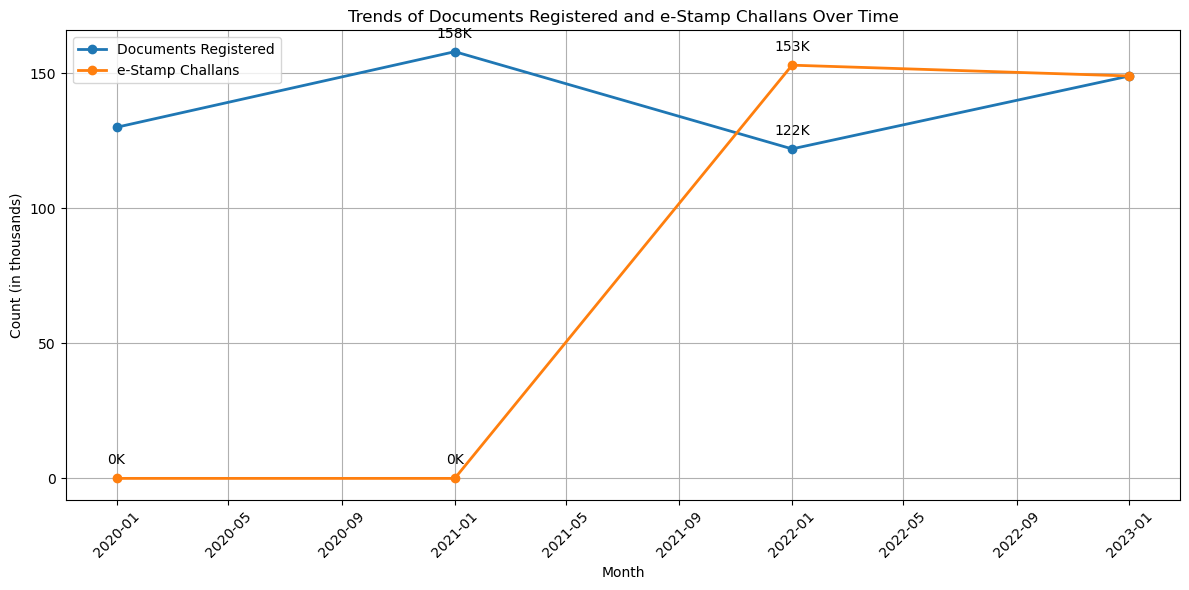

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
merged_df = pd.DataFrame({
    'month': ['Jan 2020', 'Jan 2021', 'Jan 2022', 'Jan 2023'],
    'documents_registered_cnt': [130000, 158000, 122000, 149000],
    'estamps_challans_cnt': [0, 0, 153000, 149000]
})

# Convert 'documents_registered_cnt' and 'estamps_challans_cnt' to numeric
merged_df['documents_registered_cnt'] = pd.to_numeric(merged_df['documents_registered_cnt'], errors='coerce')
merged_df['estamps_challans_cnt'] = pd.to_numeric(merged_df['estamps_challans_cnt'], errors='coerce')

# Drop rows with missing values in these columns
merged_df.dropna(subset=['documents_registered_cnt', 'estamps_challans_cnt'], inplace=True)

# Sort the dataframe by 'month'
merged_df['month'] = pd.to_datetime(merged_df['month'], format='%b %Y')  # Convert month to datetime format
merged_df.sort_values(by='month', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(merged_df['month'], merged_df['documents_registered_cnt'], marker='o', label='Documents Registered', linewidth=2)
plt.plot(merged_df['month'], merged_df['estamps_challans_cnt'], marker='o', label='e-Stamp Challans', linewidth=2)
plt.title('Trends of Documents Registered and e-Stamp Challans Over Time')
plt.xlabel('Month')
plt.ylabel('Count (in thousands)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 200000, 50000), labels=['0', '50', '100', '150'])

# Annotate high and low peaks for 'Documents Registered'
for i, cnt in enumerate(merged_df['documents_registered_cnt']):
    if cnt == merged_df['documents_registered_cnt'].max() or cnt == merged_df['documents_registered_cnt'].min():
        plt.annotate(f'{cnt // 1000}K', (merged_df['month'].iloc[i], cnt), textcoords="offset points", xytext=(0,10), ha='center')

# Annotate high and low peaks for 'e-Stamp Challans'
for i, cnt in enumerate(merged_df['estamps_challans_cnt']):
    if cnt == merged_df['estamps_challans_cnt'].max() or cnt == merged_df['estamps_challans_cnt'].min():
        plt.annotate(f'{cnt // 1000}K', (merged_df['month'].iloc[i], cnt), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()


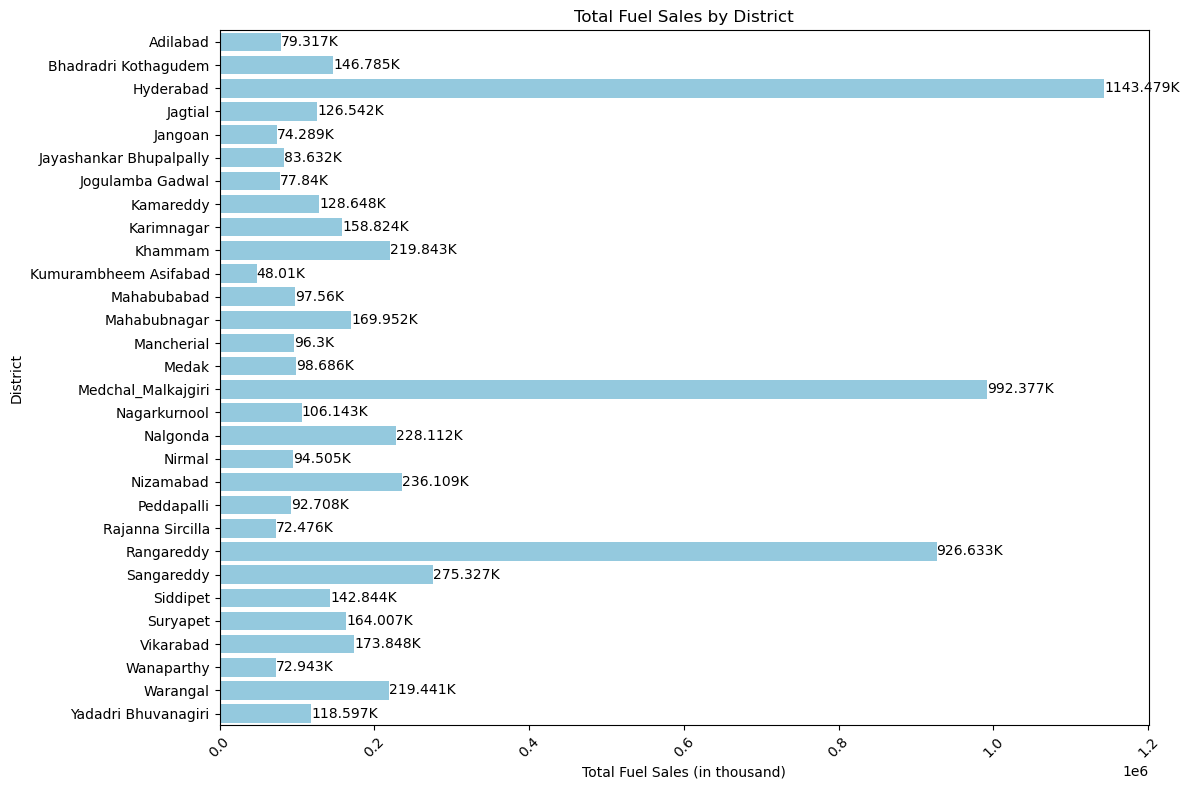

In [131]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Grouping the data by district and summing up the total fuel sales
total_fuel_sales_by_district = merged_data.groupby('district')[['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']].sum().reset_index()

# Summing up the total fuel sales across all fuel types
total_fuel_sales_by_district['total_fuel_sales'] = total_fuel_sales_by_district.iloc[:, 1:].sum(axis=1)

# Plotting the bar graph
bar_plot = sns.barplot(x='total_fuel_sales', y='district', data=total_fuel_sales_by_district, color='skyblue')

# Adding title and labels
plt.title('Total Fuel Sales by District')
plt.xlabel('Total Fuel Sales (in thousand)')
plt.ylabel('District')

# Adding annotations for the exact values on the bars
for i in range(len(total_fuel_sales_by_district)):
    bar_plot.text(total_fuel_sales_by_district['total_fuel_sales'].iloc[i], i, 
                  str(total_fuel_sales_by_district['total_fuel_sales'].iloc[i] / 1000) + 'K', va='center')

# Set x-axis ticks to match the values of the bars
plt.xticks(rotation=45, fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


In [135]:
print(total_sales_by_month['Brand_new_vehicles'].dtype)
print(total_sales_by_month['Brand_new_vehicles'].head())


int64
0    158951
1    163618
2    165108
3    149925
4    145140
Name: Brand_new_vehicles, dtype: int64


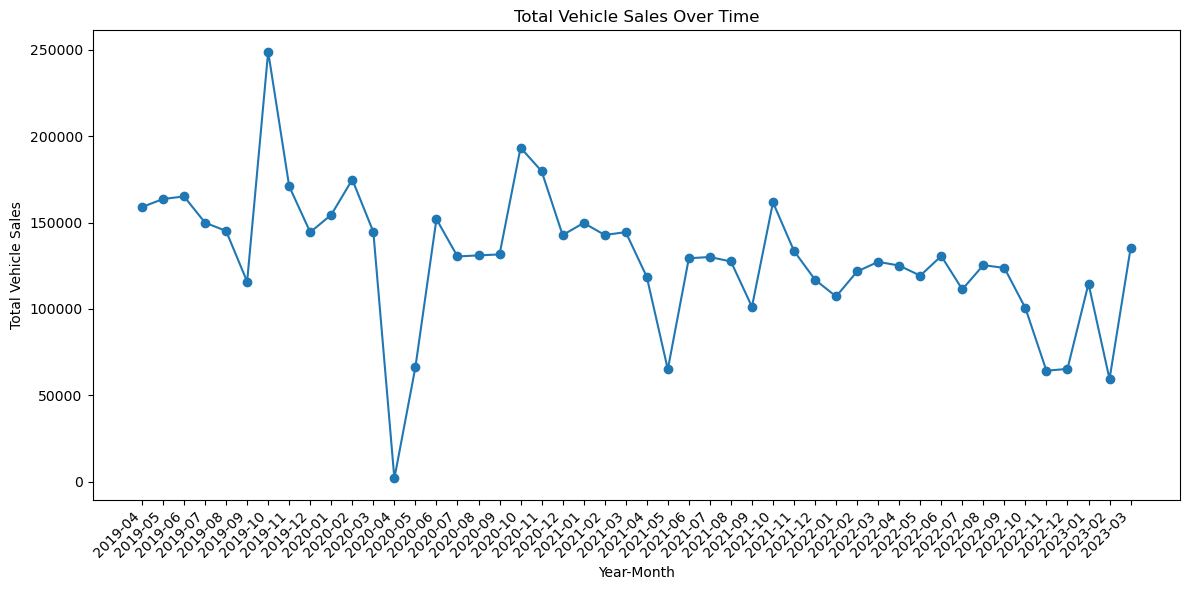

In [137]:
plt.figure(figsize=(12, 6))
plt.plot(total_sales_by_month['year_month'].astype(str), total_sales_by_month['Brand_new_vehicles'], marker='o')
plt.title('Total Vehicle Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Vehicle Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
fact_transport = pd.read_csv("fact_transport.csv")
dim_districts = pd.read_csv("dim_districts.csv")

# Merge the datasets based on district code
merged_data = pd.merge(fact_transport, dim_districts, on="dist_code")

# Check the merged dataset
print("Merged dataset:")
print(merged_data.head())

Merged dataset:
  dist_code       month  fuel_type_petrol  fuel_type_diesel  \
0      15_1  2019-04-01             17910              3011   
1      15_1  2019-05-01             17962              3280   
2      15_1  2019-06-01             19367              3656   
3      15_1  2019-07-01             18266              3038   
4      15_1  2019-08-01             18269              3446   

   fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
0                  76                22                    15308   
1                  76                27                    15060   
2                  95                35                    16711   
3                  72                39                    15846   
4                  68                34                    15533   

   vehicleClass_MotorCar  vehicleClass_AutoRickshaw  vehicleClass_Agriculture  \
0                   4429                          0                         4   
1                   4667          

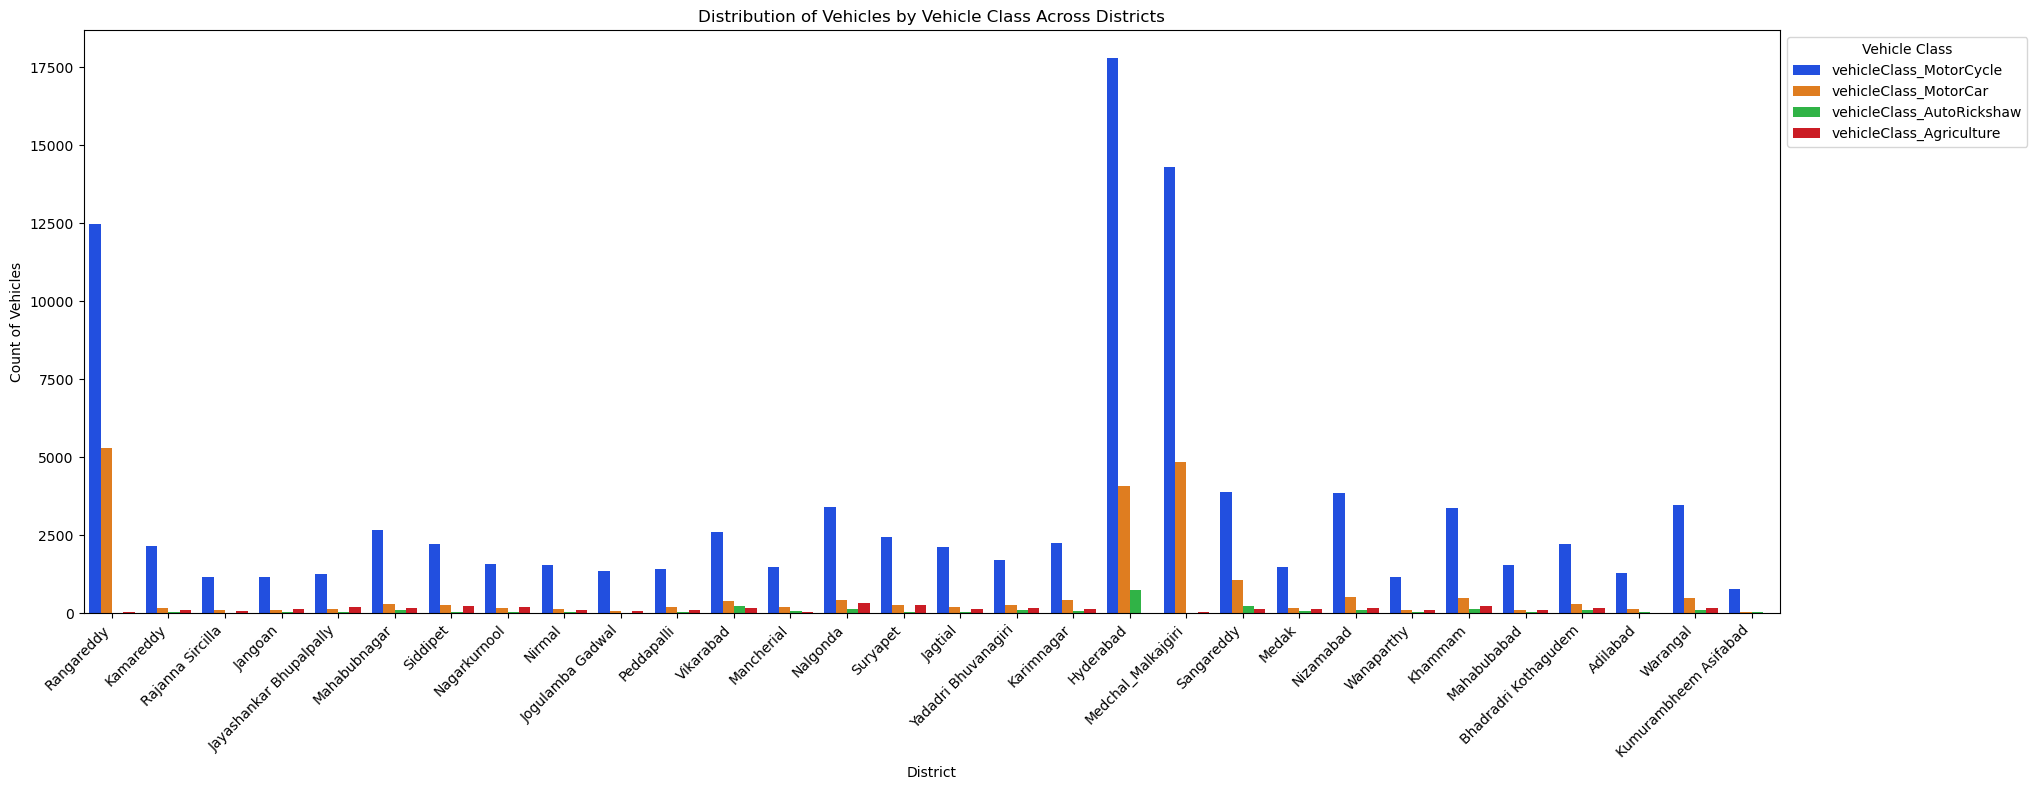

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract relevant columns from the merged dataset
vehicle_class_data = merged_data[['district', 'vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture']]

# Melt the dataset to long format for easy plotting
vehicle_class_data_melted = vehicle_class_data.melt(id_vars='district', var_name='Vehicle_Class', value_name='Count')

# Plot the distribution of vehicles by vehicle class across different districts
plt.figure(figsize=(18, 8))  # Increased figure size
sns.barplot(x='district', y='Count', hue='Vehicle_Class', data=vehicle_class_data_melted, dodge=True, palette='bright', saturation=0.75, errorbar=None)  # Set dodge=True to separate the bars
plt.title('Distribution of Vehicles by Vehicle Class Across Districts')
plt.xlabel('District')
plt.ylabel('Count of Vehicles')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right
plt.tight_layout()
plt.legend(title='Vehicle Class', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


NameError: name 'FixedLocator' is not defined

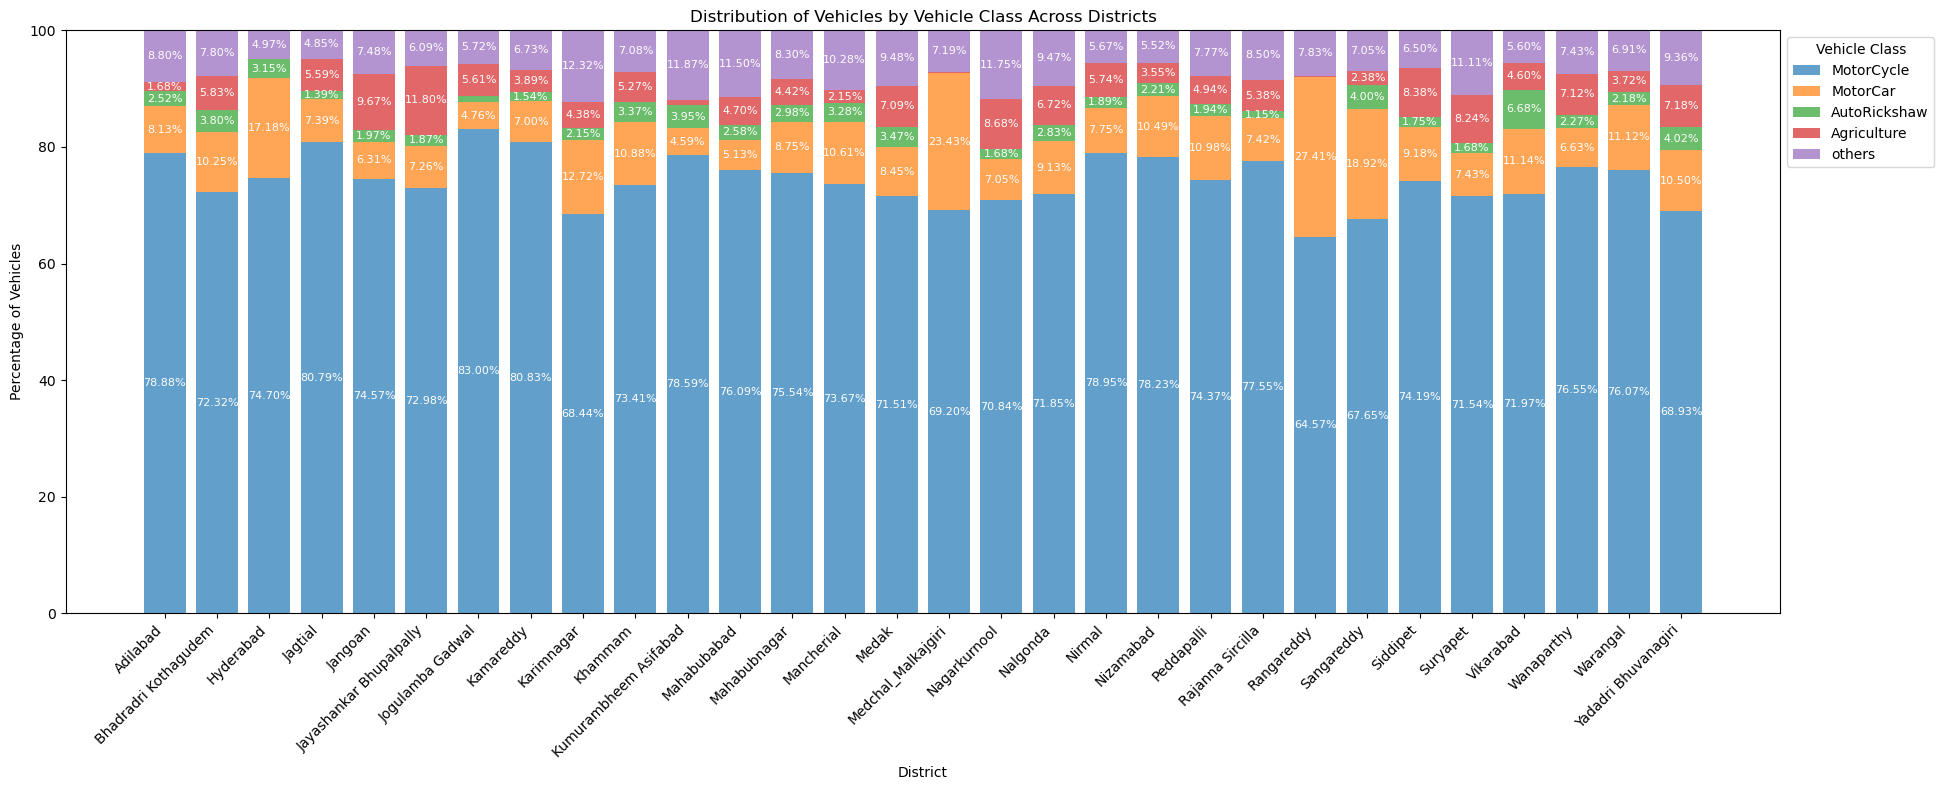

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the main data
data = pd.read_csv("fact_transport.csv")

# Load the dataset containing district names
district_names = pd.read_csv("dim_districts.csv")

# Merge the main data with the dataset containing district names
merged_data = pd.merge(data, district_names, on='dist_code')

# Define a function to plot stacked vehicle distribution
def plot_stacked_vehicle_distribution(data, id_var='district', var_cols=None, title='Distribution of Vehicles by Vehicle Class Across Districts', min_percentage_display=1.0):
    if var_cols is None:
        var_cols = ['vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture', 'vehicleClass_others']

    # Aggregate vehicle class counts across months for each district
    data_agg = data.groupby(id_var)[var_cols].sum().reset_index()

    # Calculate the total count of vehicles in each district
    data_agg['total_vehicles'] = data_agg[var_cols].sum(axis=1)
    
    # Calculate the percentage of each vehicle class
    for col in var_cols:
        data_agg[col + '_percentage'] = (data_agg[col] / data_agg['total_vehicles']) * 100

    # Melt the dataset to long format for easy plotting
    data_melted = data_agg.melt(id_vars=id_var, value_vars=[col + '_percentage' for col in var_cols], var_name='Vehicle_Class', value_name='Percentage')

    # Plot the stacked distribution of vehicles by vehicle class across different districts
    plt.figure(figsize=(18, 8))

    # Initialize the bottom position for each bar
    bottom_pos = pd.Series([0] * len(data_agg))

    for col in var_cols:
        bars = plt.bar(range(len(data_agg)), data_agg[col + '_percentage'], bottom=bottom_pos, label=col.split('_')[1], alpha=0.7)
        bottom_pos += data_agg[col + '_percentage']

        # Annotate each bar with percentage values
        for i, value in enumerate(data_agg[col + '_percentage']):
            if abs(value) >= min_percentage_display:  # Check if the absolute value of the percentage is greater than or equal to the threshold
                if bars[i].get_height() > 0:  # Check if the bar has a non-zero height
                    plt.text(i, bottom_pos[i] - value*0.5, f'{value:.2f}%', ha='center', va='center', color='white', fontsize=8)
                else:
                    plt.text(i, bottom_pos[i] + value*0.5, f'{value:.2f}%', ha='center', va='center', color='white', fontsize=8)

    # Set x-axis ticks and labels to be the district names
    plt.xticks(range(len(data_agg)), data_agg[id_var], rotation=45, ha='right')

    plt.title(title)
    plt.xlabel('District')
    plt.ylabel('Percentage of Vehicles')
    plt.tight_layout()
    plt.legend(title='Vehicle Class', bbox_to_anchor=(1, 1), loc='upper left')
    plt.ylim(0, 100)
    
    # Format Y-axis tick labels to include '%' symbol
    y_ticks = plt.gca().get_yticks()
    plt.gca().yaxis.set_major_locator(FixedLocator(y_ticks))
    plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in y_ticks])

    plt.show()

# Plot the stacked distribution of vehicles by vehicle class across different districts
plot_stacked_vehicle_distribution(merged_data)


In [163]:
# Convert 'month' column to datetime format if necessary
merged_data['month'] = pd.to_datetime(merged_data['month'])

# Filter the dataset for FY 2022
fy_2022_data = merged_data[merged_data['month'].dt.year == 2022]

# Group the data by district and calculate the total count of each vehicle class
district_vehicle_class_counts = fy_2022_data.groupby('district')[['vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture']].sum()

# Identify the predominant vehicle class for each district
district_vehicle_class_counts['Predominant_Vehicle_Class'] = district_vehicle_class_counts.idxmax(axis=1)

# Display the result
print("Districts with Predominant Preference for a Specific Vehicle Class in FY 2022:")
print(district_vehicle_class_counts['Predominant_Vehicle_Class'])


Districts with Predominant Preference for a Specific Vehicle Class in FY 2022:
district
Adilabad                   vehicleClass_MotorCycle
Bhadradri Kothagudem       vehicleClass_MotorCycle
Hyderabad                  vehicleClass_MotorCycle
Jagtial                    vehicleClass_MotorCycle
Jangoan                    vehicleClass_MotorCycle
Jayashankar Bhupalpally    vehicleClass_MotorCycle
Jogulamba Gadwal           vehicleClass_MotorCycle
Kamareddy                  vehicleClass_MotorCycle
Karimnagar                 vehicleClass_MotorCycle
Khammam                    vehicleClass_MotorCycle
Kumurambheem Asifabad      vehicleClass_MotorCycle
Mahabubabad                vehicleClass_MotorCycle
Mahabubnagar               vehicleClass_MotorCycle
Mancherial                 vehicleClass_MotorCycle
Medak                      vehicleClass_MotorCycle
Medchal_Malkajgiri         vehicleClass_MotorCycle
Nagarkurnool               vehicleClass_MotorCycle
Nalgonda                   vehicleClass_Motor

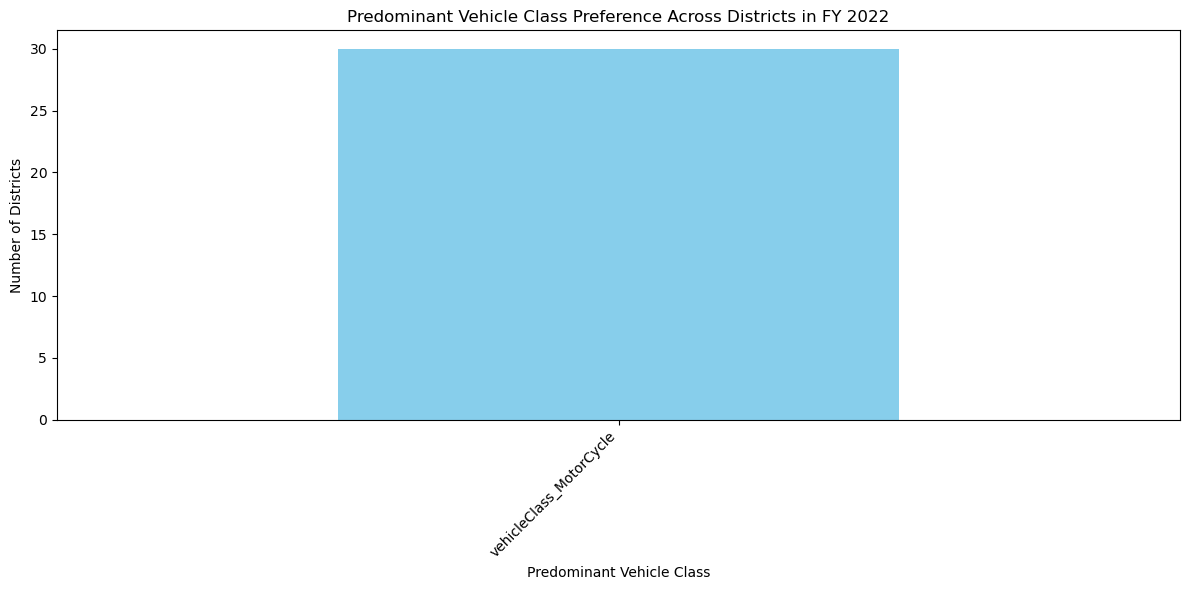

In [164]:
import matplotlib.pyplot as plt

# Plot the predominant vehicle class preference for each district
plt.figure(figsize=(12, 6))
district_vehicle_class_counts['Predominant_Vehicle_Class'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Predominant Vehicle Class Preference Across Districts in FY 2022')
plt.xlabel('Predominant Vehicle Class')
plt.ylabel('Number of Districts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
fact_transport = pd.read_csv("fact_transport.csv")
dim_districts = pd.read_csv("dim_districts.csv")

# Merge the datasets based on district code
merged_data = pd.merge(fact_transport, dim_districts, on="dist_code")

# Check the merged dataset
print("Merged dataset:")
print(merged_data.head())

Merged dataset:
  dist_code       month  fuel_type_petrol  fuel_type_diesel  \
0      15_1  2019-04-01             17910              3011   
1      15_1  2019-05-01             17962              3280   
2      15_1  2019-06-01             19367              3656   
3      15_1  2019-07-01             18266              3038   
4      15_1  2019-08-01             18269              3446   

   fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
0                  76                22                    15308   
1                  76                27                    15060   
2                  95                35                    16711   
3                  72                39                    15846   
4                  68                34                    15533   

   vehicleClass_MotorCar  vehicleClass_AutoRickshaw  vehicleClass_Agriculture  \
0                   4429                          0                         4   
1                   4667          

In [170]:
print(merged_data.columns)


Index(['dist_code', 'month', 'fuel_type_petrol', 'fuel_type_diesel',
       'fuel_type_electric', 'fuel_type_others', 'vehicleClass_MotorCycle',
       'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw',
       'vehicleClass_Agriculture', 'vehicleClass_others',
       'seatCapacity_1_to_3', 'seatCapacity_4_to_6', 'seatCapacity_above_6',
       'Brand_new_vehicles', 'Pre-owned_vehicles', 'category_Non-Transport',
       'category_Transport', 'district'],
      dtype='object')


In [171]:
fy_2021_sales = fy_2021_data.groupby(['district', 'fuel_type_petrol'])['Brand_new_vehicles'].mean().reset_index()
fy_2022_sales = fy_2022_data.groupby(['district', 'fuel_type_petrol'])['Brand_new_vehicles'].mean().reset_index()


In [172]:
# Merge the sales data for FY 2021 and FY 2022
merged_sales = fy_2021_sales.merge(fy_2022_sales, on=['district', 'fuel_type_petrol'], suffixes=('_2021', '_2022'))

# Calculate the sales growth
merged_sales['Sales_Growth'] = ((merged_sales['Brand_new_vehicles_2022'] - merged_sales['Brand_new_vehicles_2021']) / merged_sales['Brand_new_vehicles_2021']) * 100

# Sort the data by sales growth
merged_sales_sorted = merged_sales.sort_values(by='Sales_Growth', ascending=False)

# Top 3 districts with highest sales growth
top_3_districts = merged_sales_sorted.head(3)

# Bottom 3 districts with lowest sales growth
bottom_3_districts = merged_sales_sorted.tail(3)


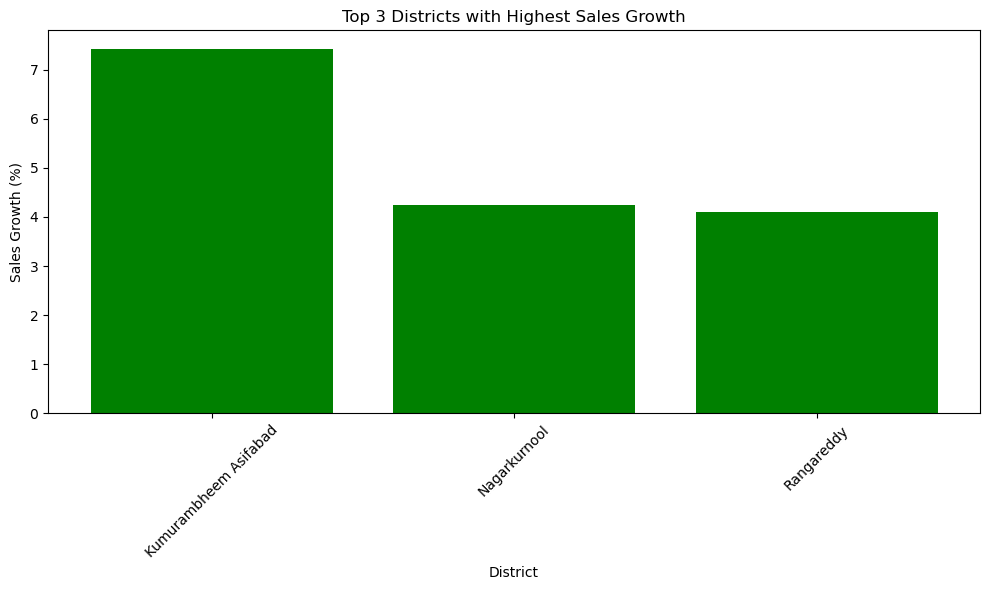

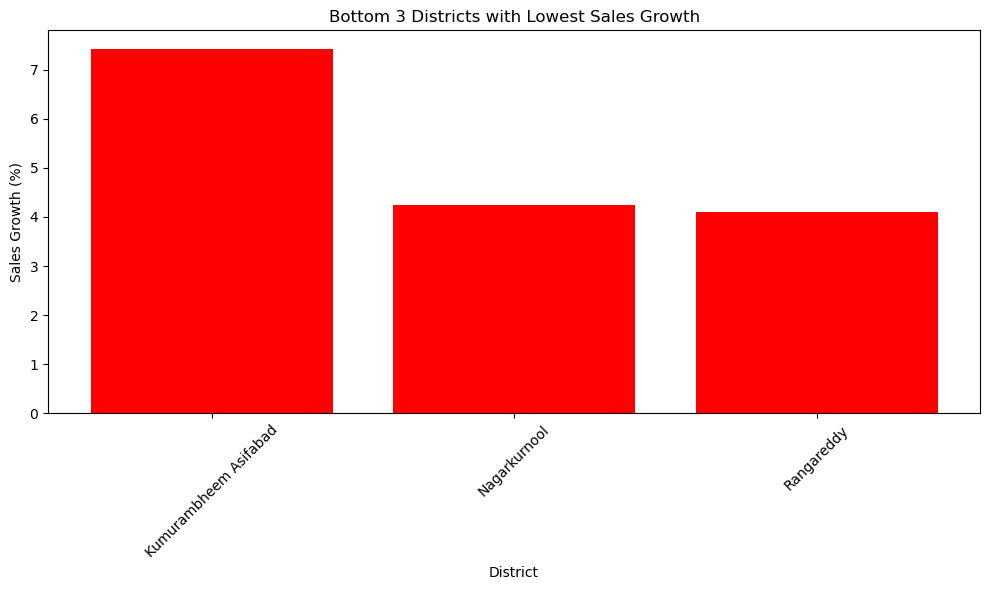

In [173]:
import matplotlib.pyplot as plt

# Create a bar plot for top 3 districts
plt.figure(figsize=(10, 6))
plt.bar(top_3_districts['district'], top_3_districts['Sales_Growth'], color='green')
plt.xlabel('District')
plt.ylabel('Sales Growth (%)')
plt.title('Top 3 Districts with Highest Sales Growth')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a bar plot for bottom 3 districts
plt.figure(figsize=(10, 6))
plt.bar(bottom_3_districts['district'], bottom_3_districts['Sales_Growth'], color='red')
plt.xlabel('District')
plt.ylabel('Sales Growth (%)')
plt.title('Bottom 3 Districts with Lowest Sales Growth')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [196]:
import pandas as pd

# Load the datasets
fact_TS_iPASS = pd.read_csv("fact_TS_iPASS.csv")
dim_districts = pd.read_csv("dim_districts.csv")

# Merge the datasets based on district code
merged_data = pd.merge(fact_TS_iPASS, dim_districts, on="dist_code")

# Convert 'month' column to datetime
merged_data['month'] = pd.to_datetime(merged_data['month'], format='%d-%m-%Y')

# Filter data for FY 2022 (April 2021 to March 20>22)
fy22_data = merged_data[(merged_data['month'] >= '2021-04-01') & (merged_data['month'] <= '2022-03-31')]

# Group by sector and sum the investments
sector_investment_fy22 = fy22_data.groupby('sector')['investment in cr'].sum().reset_index()

# Get the top 5 sectors with the highest investments
top_5_sectors_fy22 = sector_investment_fy22.nlargest(5, 'investment in cr')

print(top_5_sectors_fy22)


                                           sector  investment in cr
11                  Pharmaceuticals and Chemicals         6860.9321
12                             Plastic and Rubber         2059.6245
14  Real Estate,Industrial Parks and IT Buildings         2015.2619
2                                       Beverages         1843.6802
7                                 Food Processing          999.3621


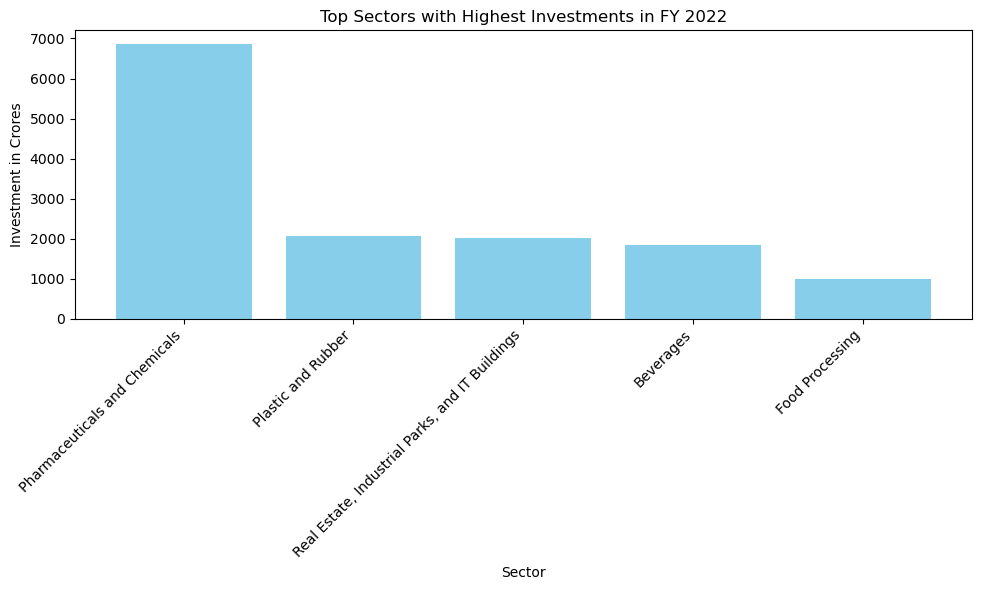

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the top sectors and their investments
top_sectors = pd.DataFrame({
    "sector": ["Pharmaceuticals and Chemicals", "Plastic and Rubber", "Real Estate, Industrial Parks, and IT Buildings",
               "Beverages", "Food Processing"],
    "investment in cr": [6860.9321, 2059.6245, 2015.2619, 1843.6802, 999.3621]
})

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_sectors['sector'], top_sectors['investment in cr'], color='skyblue')
plt.title('Top Sectors with Highest Investments in FY 2022')
plt.xlabel('Sector')
plt.ylabel('Investment in Crores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


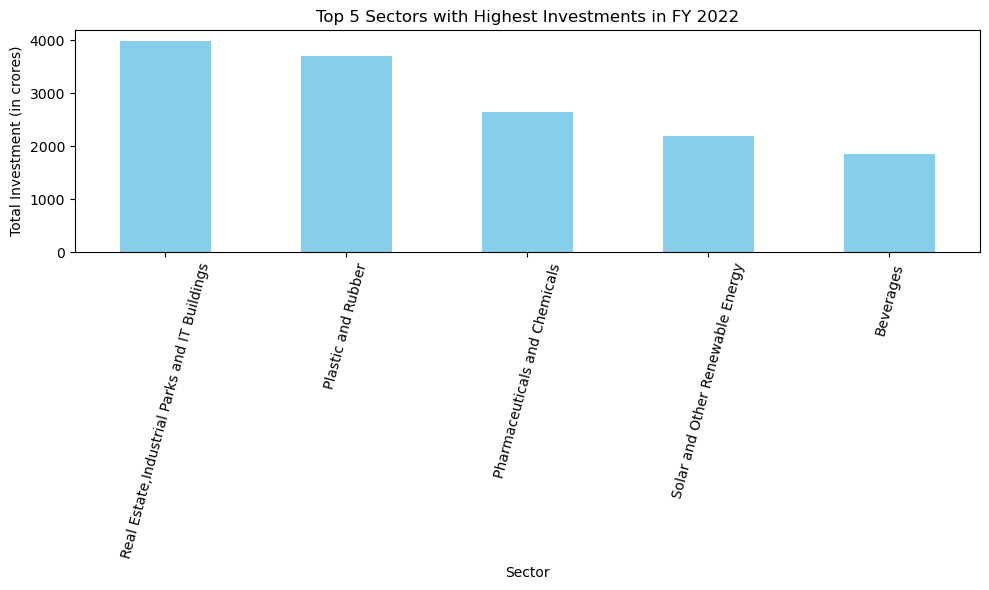

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv("fact_TS_iPASS.csv")

# Convert 'month' column to datetime format if necessary
data['month'] = pd.to_datetime(data['month'], format='%d-%m-%Y')

# Filter the dataset for FY 2022
fy_2022_data = data[data['month'].dt.year == 2022]

# Group the data by sector and calculate the total investment in each sector
sector_investment = fy_2022_data.groupby('sector')['investment in cr'].sum()

# Sort the sectors based on their total investment in descending order
top_5_sectors = sector_investment.nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
top_5_sectors.plot(kind='bar', color='skyblue')
plt.title('Top 5 Sectors with Highest Investments in FY 2022')
plt.xlabel('Sector')
plt.ylabel('Total Investment (in crores)')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


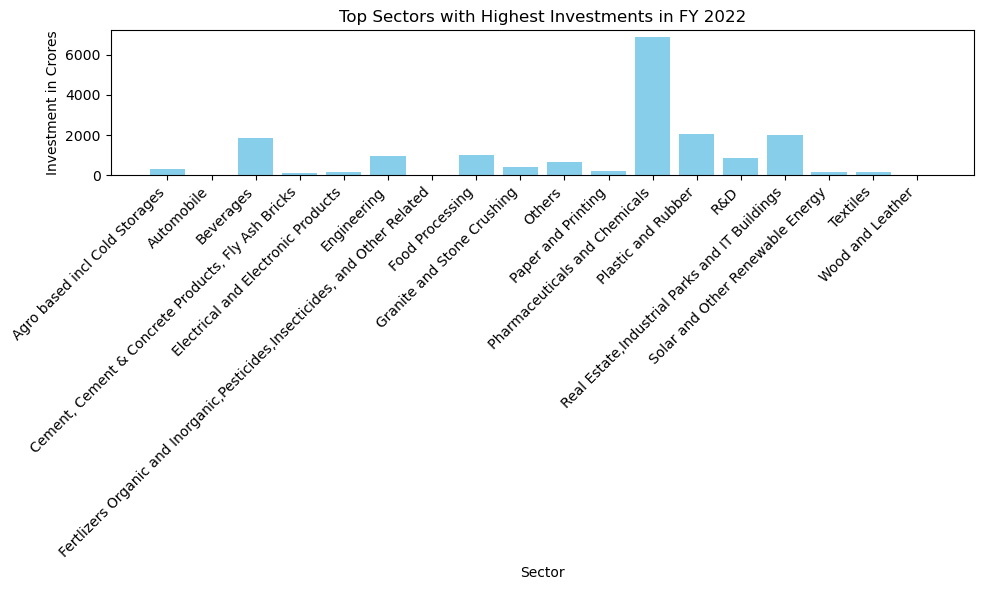

In [198]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
fact_TS_iPASS = pd.read_csv("fact_TS_iPASS.csv")
dim_districts = pd.read_csv("dim_districts.csv")

# Merge the datasets based on district code
merged_data = pd.merge(fact_TS_iPASS, dim_districts, on="dist_code")

# Convert 'month' column to datetime
merged_data['month'] = pd.to_datetime(merged_data['month'], format='%d-%m-%Y')

# Filter data for FY 2022 (April 2021 to March 2022)
fy22_data = merged_data[(merged_data['month'] >= '2021-04-01') & (merged_data['month'] <= '2022-03-31')]

# Group by sector and sum the investments
sector_investment_fy22 = fy22_data.groupby('sector')['investment in cr'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sector_investment_fy22['sector'], sector_investment_fy22['investment in cr'], color='skyblue')
plt.title('Top Sectors with Highest Investments in FY 2022')
plt.xlabel('Sector')
plt.ylabel('Investment in Crores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


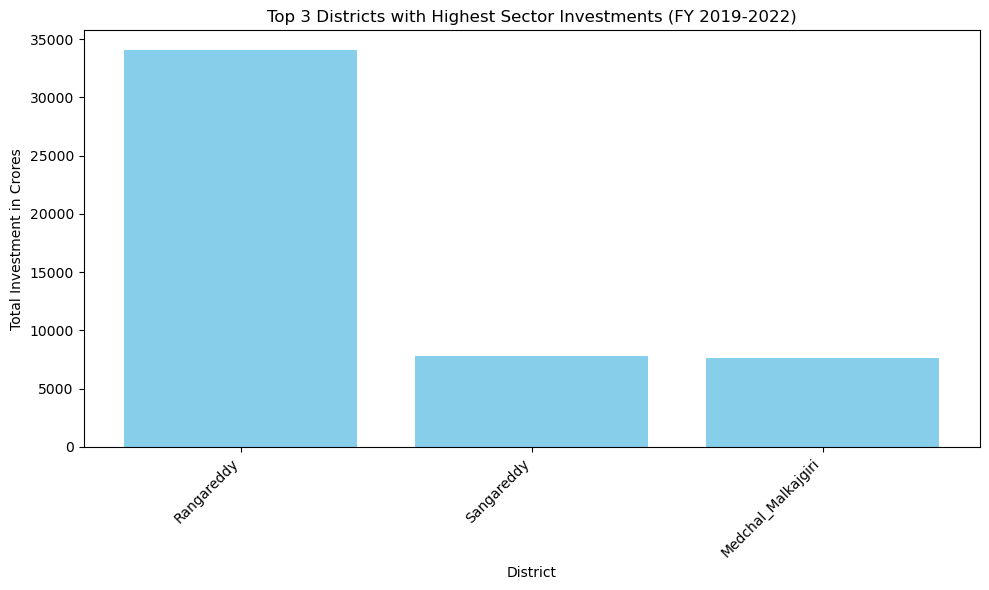

Top 3 Districts with Highest Sector Investments:
              district  investment in cr
25          Rangareddy        34042.5382
26          Sangareddy         7764.0419
16  Medchal_Malkajgiri         7626.0387


In [199]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
fact_TS_iPASS = pd.read_csv("fact_TS_iPASS.csv")
dim_districts = pd.read_csv("dim_districts.csv")

# Merge the datasets based on district code
merged_data = pd.merge(fact_TS_iPASS, dim_districts, on="dist_code")

# Convert 'month' column to datetime
merged_data['month'] = pd.to_datetime(merged_data['month'], format='%d-%m-%Y')

# Filter data for FY 2019 to 2022 (April 2019 to March 2022)
fy19_to_22_data = merged_data[(merged_data['month'] >= '2019-04-01') & (merged_data['month'] <= '2022-03-31')]

# Group by district and sum the investments
district_investment = fy19_to_22_data.groupby('district')['investment in cr'].sum().reset_index()

# Get the top 3 districts with the highest total investments
top_3_districts = district_investment.nlargest(3, 'investment in cr')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_3_districts['district'], top_3_districts['investment in cr'], color='skyblue')
plt.title('Top 3 Districts with Highest Sector Investments (FY 2019-2022)')
plt.xlabel('District')
plt.ylabel('Total Investment in Crores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print top 3 districts
print("Top 3 Districts with Highest Sector Investments:")
print(top_3_districts)


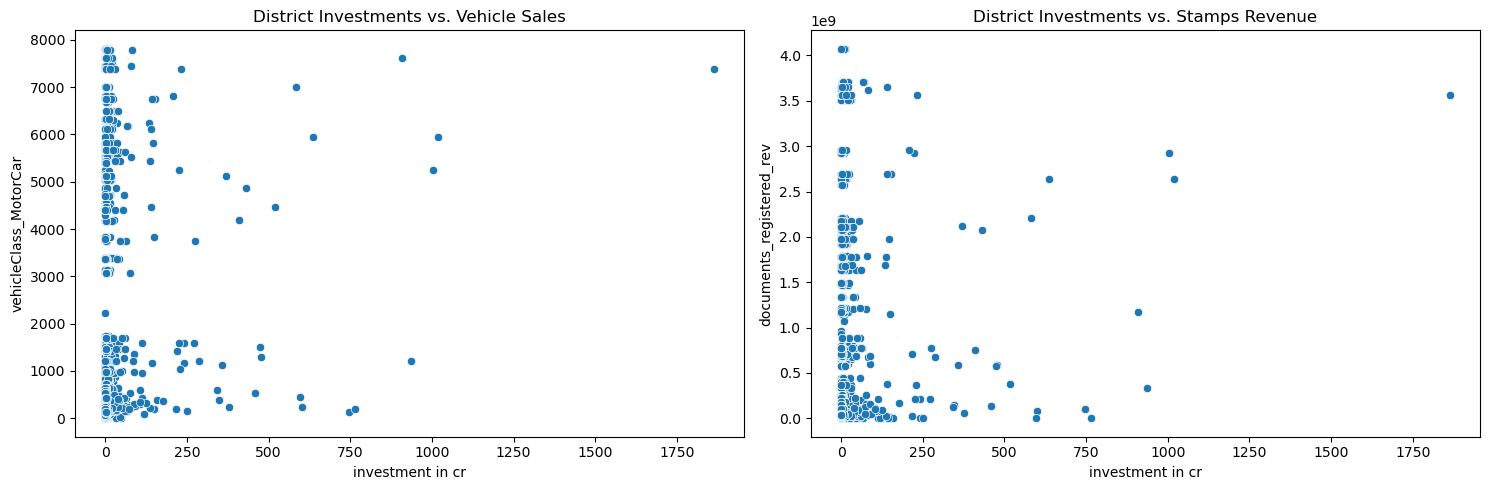

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
investments_df = pd.read_csv("fact_TS_iPASS.csv")
vehicle_sales_df = pd.read_csv("fact_transport.csv")
stamps_revenue_df = pd.read_csv("fact_stamps.csv")

# Convert 'month' columns to datetime
investments_df['month'] = pd.to_datetime(investments_df['month'], format='%d-%m-%Y')
vehicle_sales_df['month'] = pd.to_datetime(vehicle_sales_df['month'])  # Correcting date format parsing
stamps_revenue_df['month'] = pd.to_datetime(stamps_revenue_df['month'])  # Correcting date format parsing

# Filter data for FY 2021 and 2022 (April 2020 to March 2022)
investments_df = investments_df[(investments_df['month'] >= '2020-04-01') & (investments_df['month'] <= '2022-03-31')]
vehicle_sales_df = vehicle_sales_df[(vehicle_sales_df['month'] >= '2020-04-01') & (vehicle_sales_df['month'] <= '2022-03-31')]
stamps_revenue_df = stamps_revenue_df[(stamps_revenue_df['month'] >= '2020-04-01') & (stamps_revenue_df['month'] <= '2022-03-31')]

# Merge datasets based on district code and month
merged_df = pd.merge(investments_df, vehicle_sales_df, on=['dist_code', 'month'])
merged_df = pd.merge(merged_df, stamps_revenue_df, on=['dist_code', 'month'])

# Plotting
plt.figure(figsize=(15, 5))

# Scatter plot of district investments vs. vehicle sales
plt.subplot(1, 2, 1)
sns.scatterplot(data=merged_df, x='investment in cr', y='vehicleClass_MotorCar')
plt.title('District Investments vs. Vehicle Sales')

# Scatter plot of district investments vs. stamps revenue
plt.subplot(1, 2, 2)
sns.scatterplot(data=merged_df, x='investment in cr', y='documents_registered_rev')
plt.title('District Investments vs. Stamps Revenue')

plt.tight_layout()
plt.show()


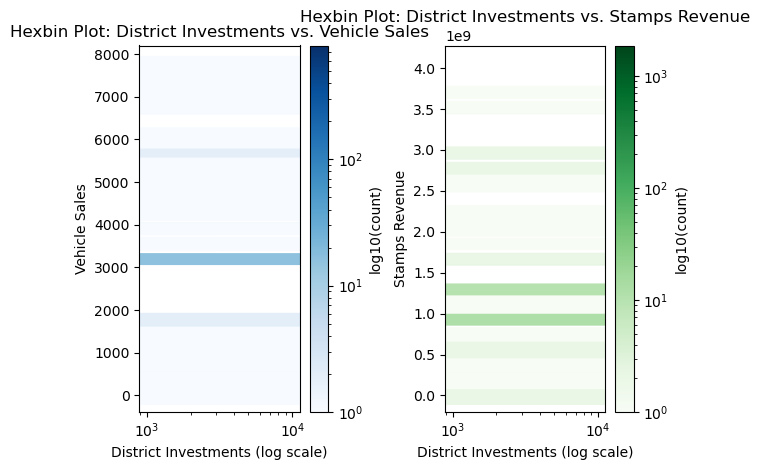

In [207]:
# Hexbin plot of district investments vs. vehicle sales
plt.subplot(1, 2, 1)
plt.hexbin(x=merged_df['investment in cr'], y=merged_df['vehicleClass_MotorCar'], gridsize=20, cmap='Blues', bins='log')
plt.colorbar(label='log10(count)')
plt.xscale('log')
plt.xlabel('District Investments (log scale)')
plt.ylabel('Vehicle Sales')
plt.title('Hexbin Plot: District Investments vs. Vehicle Sales')

# Hexbin plot of district investments vs. stamps revenue
plt.subplot(1, 2, 2)
plt.hexbin(x=merged_df['investment in cr'], y=merged_df['documents_registered_rev'], gridsize=20, cmap='Greens', bins='log')
plt.colorbar(label='log10(count)')
plt.xscale('log')
plt.xlabel('District Investments (log scale)')
plt.ylabel('Stamps Revenue')
plt.title('Hexbin Plot: District Investments vs. Stamps Revenue')

plt.tight_layout()
plt.show()


In [211]:
print(merged_df.columns)


Index(['dist_code', 'month', 'sector', 'investment in cr',
       'number_of_employees', 'fuel_type_petrol', 'fuel_type_diesel',
       'fuel_type_electric', 'fuel_type_others', 'vehicleClass_MotorCycle',
       'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw',
       'vehicleClass_Agriculture', 'vehicleClass_others',
       'seatCapacity_1_to_3', 'seatCapacity_4_to_6', 'seatCapacity_above_6',
       'Brand_new_vehicles', 'Pre-owned_vehicles', 'category_Non-Transport',
       'category_Transport', 'documents_registered_cnt',
       'documents_registered_rev', 'estamps_challans_cnt',
       'estamps_challans_rev'],
      dtype='object')


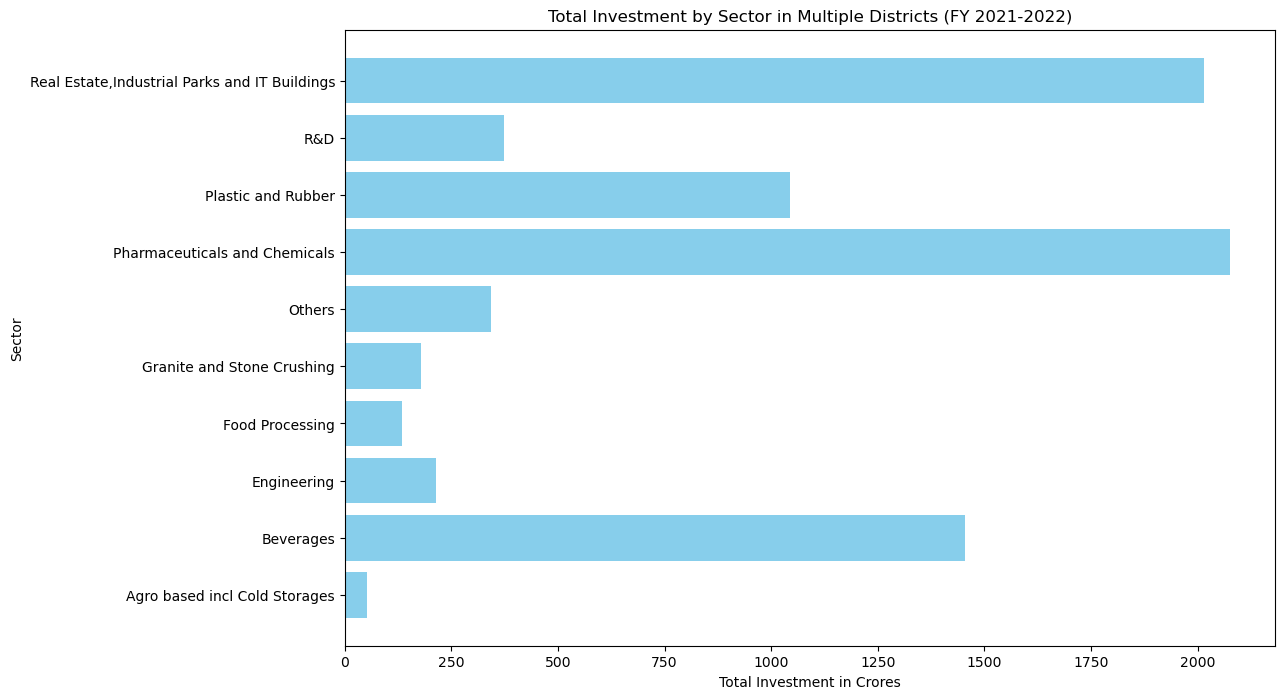

In [223]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
fact_TS_iPASS = pd.read_csv("fact_TS_iPASS.csv")

# Convert 'month' column to datetime
fact_TS_iPASS['month'] = pd.to_datetime(fact_TS_iPASS['month'], format='%d-%m-%Y')

# Filter data for FY 2021 and 2022 (April 2020 to March 2022)
fact_TS_iPASS_fy21_22 = fact_TS_iPASS[(fact_TS_iPASS['month'] >= '2021-04-01') & (fact_TS_iPASS['month'] <= '2022-03-31')]

# Aggregate data by sector and district
sector_district_investment = fact_TS_iPASS_fy21_22.groupby(['sector', 'dist_code'])['investment in cr'].sum().reset_index()

# Calculate total investment by sector
sector_total_investment = sector_district_investment.groupby('sector')['investment in cr'].sum().reset_index()

# Sort sectors by total investment
sector_total_investment_sorted = sector_total_investment.sort_values(by='investment in cr', ascending=False)

# Select top sectors with substantial investment
top_sectors = sector_total_investment_sorted.head(10)['sector']

# Filter data for top sectors
top_sector_district_investment = sector_district_investment[sector_district_investment['sector'].isin(top_sectors)]

# Plotting
plt.figure(figsize=(12, 8))

# Create a barplot to visualize investment by sector in multiple districts
plt.barh(top_sector_district_investment['sector'], top_sector_district_investment['investment in cr'], color='skyblue')
plt.xlabel('Total Investment in Crores')
plt.ylabel('Sector')
plt.title('Total Investment by Sector in Multiple Districts (FY 2021-2022)')

# Show the plot
plt.show()


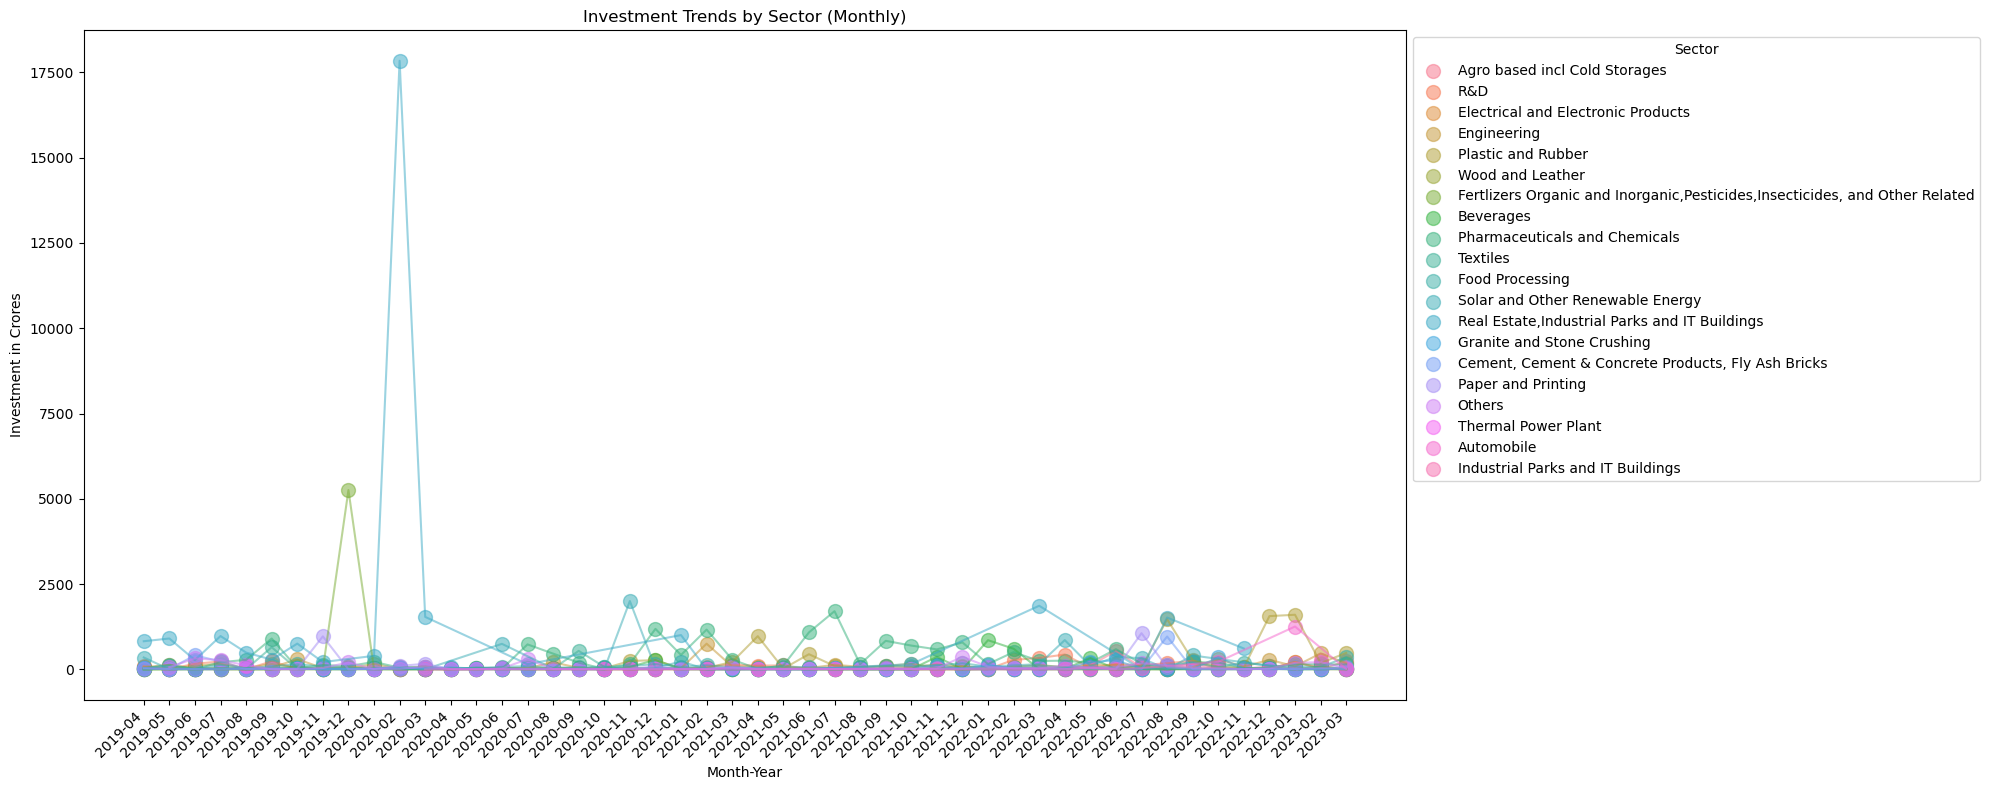

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the dataset
fact_TS_iPASS = pd.read_csv("fact_TS_iPASS.csv")

# Convert 'month' column to datetime
fact_TS_iPASS['month'] = pd.to_datetime(fact_TS_iPASS['month'], format='%d-%m-%Y')

# Extract month and year from the 'month' column
fact_TS_iPASS['month_year'] = fact_TS_iPASS['month'].dt.to_period('M').astype(str)

# Group data by sector and month-year, summing the investments
sector_monthly_investment = fact_TS_iPASS.groupby(['sector', 'month_year'])['investment in cr'].sum().reset_index()

# Sort the DataFrame by 'month_year' column
sector_monthly_investment = sector_monthly_investment.sort_values(by='month_year')

# Define a color palette with distinct colors for each sector
color_palette = sns.color_palette("husl", len(sector_monthly_investment['sector'].unique()))

# Plotting
plt.figure(figsize=(20, 8))  # Increase width of the figure

# Iterate over each sector and plot its investment trend over time
for i, sector in enumerate(sector_monthly_investment['sector'].unique()):
    sector_data = sector_monthly_investment[sector_monthly_investment['sector'] == sector]
    plt.scatter(sector_data['month_year'], sector_data['investment in cr'], label=sector, alpha=0.5, marker='o', s=100, color=color_palette[i])
    plt.plot(sector_data['month_year'], sector_data['investment in cr'], alpha=0.5, color=color_palette[i])  # Add line connecting points
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

plt.xlabel('Month-Year')
plt.ylabel('Investment in Crores')
plt.title('Investment Trends by Sector (Monthly)')
plt.legend(title='Sector', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


In [5]:
# Load the datasets
dim_districts = pd.read_csv("dim_districts.csv")
fact_stamps = pd.read_csv("fact_stamps.csv")

# Merge dim_districts with fact_stamps
merged_data = pd.merge(dim_districts, fact_stamps, on="dist_code")

# Display the merged data
print(merged_data.head())


  dist_code  district       month  documents_registered_cnt  \
0      19_1  Adilabad  2019-04-01                      1043   
1      19_1  Adilabad  2019-05-01                      1092   
2      19_1  Adilabad  2019-06-01                       824   
3      19_1  Adilabad  2019-07-01                      1186   
4      19_1  Adilabad  2019-08-01                      1124   

   documents_registered_rev  estamps_challans_cnt  estamps_challans_rev  
0                  12672655                     0                     0  
1                  15177385                     0                     0  
2                  11443194                     0                     0  
3                  17853370                     0                     0  
4                  14955291                     0                     0  


In [6]:
import pandas as pd

# Load the datasets
dim_districts = pd.DataFrame({
    'dist_code': ['19_1', '22_2', '21_1', '16_1', '20_2', '21_3', '21_7', '14_2', '18_2', '20_1', '22_1', '19_4', '21_5', '14_1', '19_3', '17_1', '15_2', '21_6', '14_3', '23_1', '14_5', '19_2', '18_1', '20_4', '20_3', '15_1', '17_2', '17_3', '23_2', '15_3', '14_4', '21_2', '23_3'],
    'district': ['Adilabad', 'Bhadradri Kothagudem', 'Hanumakonda', 'Hyderabad', 'Jagtial', 'Jangoan', 'Jayashankar Bhupalpally', 'Jogulamba Gadwal', 'Kamareddy', 'Karimnagar', 'Khammam', 'Kumurambheem Asifabad', 'Mahabubabad', 'Mahabubnagar', 'Mancherial', 'Medak', 'Medchal_Malkajgiri', 'Mulugu', 'Nagarkurnool', 'Nalgonda', 'Narayanpet', 'Nirmal', 'Nizamabad', 'Peddapalli', 'Rajanna Sircilla', 'Rangareddy', 'Sangareddy', 'Siddipet', 'Suryapet', 'Vikarabad', 'Wanaparthy', 'Warangal', 'Yadadri Bhuvanagiri']
})

fact_stamps = pd.read_csv("fact_stamps.csv")
fact_transport = pd.read_csv("fact_transport.csv")
fact_TS_iPASS = pd.read_csv("fact_TS_iPASS.csv")

# Merge dim_districts with fact_stamps
merged_stamps = pd.merge(dim_districts, fact_stamps, on="dist_code")

# Merge dim_districts with fact_transport
merged_transport = pd.merge(dim_districts, fact_transport, on="dist_code")

# Merge dim_districts with fact_TS_iPASS
merged_TS_iPASS = pd.merge(dim_districts, fact_TS_iPASS, on="dist_code")


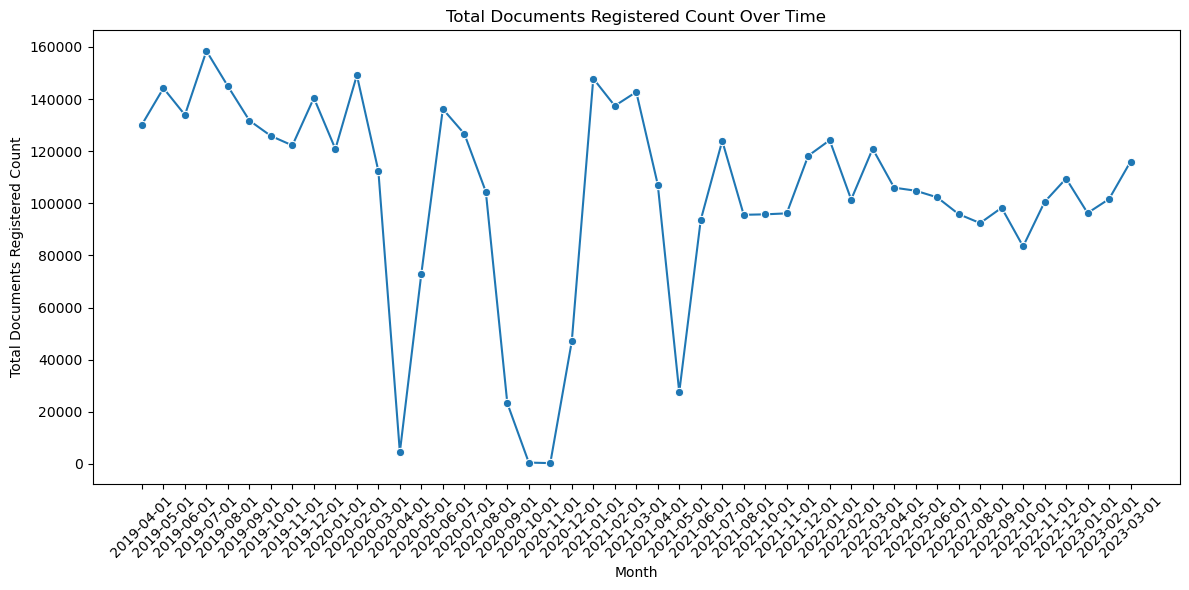

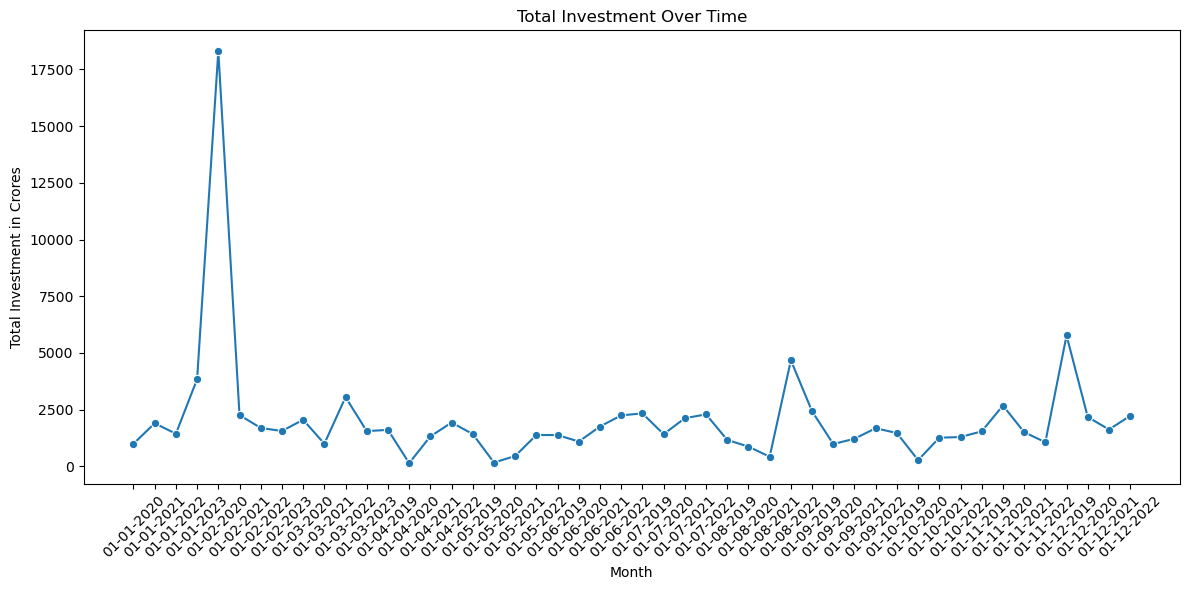

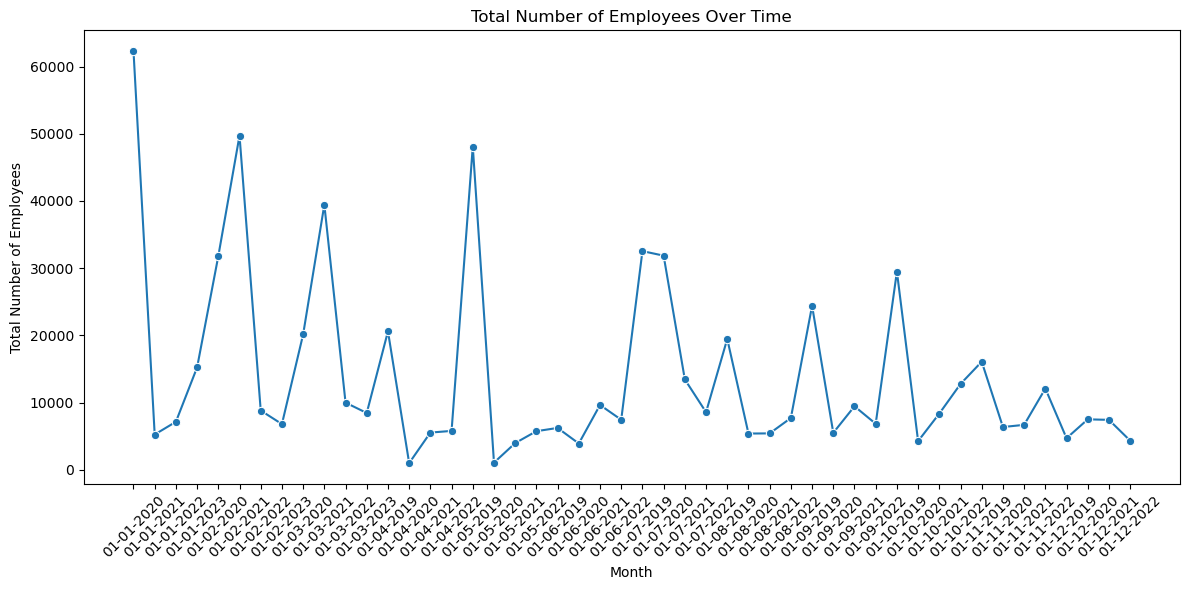

In [10]:


# Calculate total documents registered count by month
total_documents_registered = merged_stamps.groupby('month')['documents_registered_cnt'].sum().reset_index()

# Calculate total investment in crores by month
total_investment = merged_TS_iPASS.groupby('month')['investment in cr'].sum().reset_index()

# Calculate total number of employees by month
total_employees = merged_TS_iPASS.groupby('month')['number_of_employees'].sum().reset_index()

# Plot time series of total documents registered count
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_documents_registered, x='month', y='documents_registered_cnt', marker='o')
plt.title('Total Documents Registered Count Over Time')
plt.xlabel('Month')
plt.ylabel('Total Documents Registered Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot time series of total investment in crores
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_investment, x='month', y='investment in cr', marker='o')
plt.title('Total Investment Over Time')
plt.xlabel('Month')
plt.ylabel('Total Investment in Crores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot time series of total number of employees
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_employees, x='month', y='number_of_employees', marker='o')
plt.title('Total Number of Employees Over Time')
plt.xlabel('Month')
plt.ylabel('Total Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


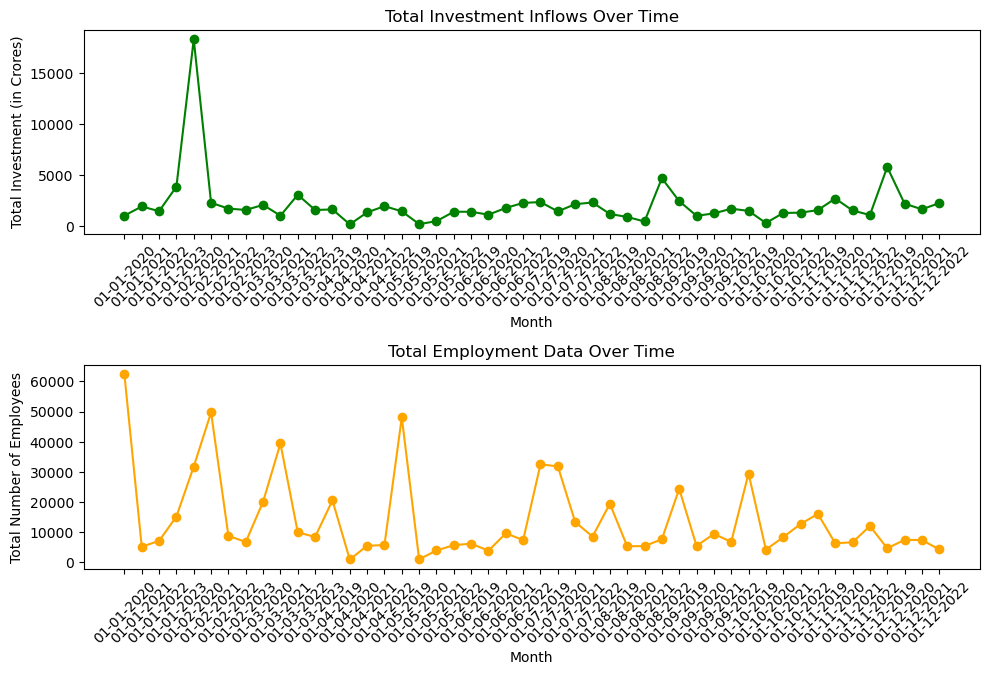

In [14]:
# Set the figure size
plt.figure(figsize=(10, 10))

# Plot total investment inflows
plt.subplot(3, 1, 2)
plt.plot(total_investment['month'], total_investment['investment in cr'], marker='o', color='green')
plt.title('Total Investment Inflows Over Time')
plt.xlabel('Month')
plt.ylabel('Total Investment (in Crores)')
plt.xticks(rotation=45)  # Rotate x-axis labels

# Plot total employment data
plt.subplot(3, 1, 3)
plt.plot(total_employees['month'], total_employees['number_of_employees'], marker='o', color='orange')
plt.title('Total Employment Data Over Time')
plt.xlabel('Month')
plt.ylabel('Total Number of Employees')
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
investments_df = pd.read_csv("fact_TS_iPASS.csv")
vehicle_sales_df = pd.read_csv("fact_transport.csv")
stamps_revenue_df = pd.read_csv("fact_stamps.csv")

# Convert 'month' columns to datetime
investments_df['month'] = pd.to_datetime(investments_df['month'], format='%d-%m-%Y')
vehicle_sales_df['month'] = pd.to_datetime(vehicle_sales_df['month'])  # Correcting date format parsing
stamps_revenue_df['month'] = pd.to_datetime(stamps_revenue_df['month'])  # Correcting date format parsing

# Filter data for FY 2021 and 2022 (April 2020 to March 2022)
investments_df = investments_df[(investments_df['month'] >= '2020-04-01') & (investments_df['month'] <= '2022-03-31')]
vehicle_sales_df = vehicle_sales_df[(vehicle_sales_df['month'] >= '2020-04-01') & (vehicle_sales_df['month'] <= '2022-03-31')]
stamps_revenue_df = stamps_revenue_df[(stamps_revenue_df['month'] >= '2020-04-01') & (stamps_revenue_df['month'] <= '2022-03-31')]

# Merge datasets based on district code and month
merged_df = pd.merge(investments_df, vehicle_sales_df, on=['dist_code', 'month'])
merged_df = pd.merge(merged_df, stamps_revenue_df, on=['dist_code', 'month'])

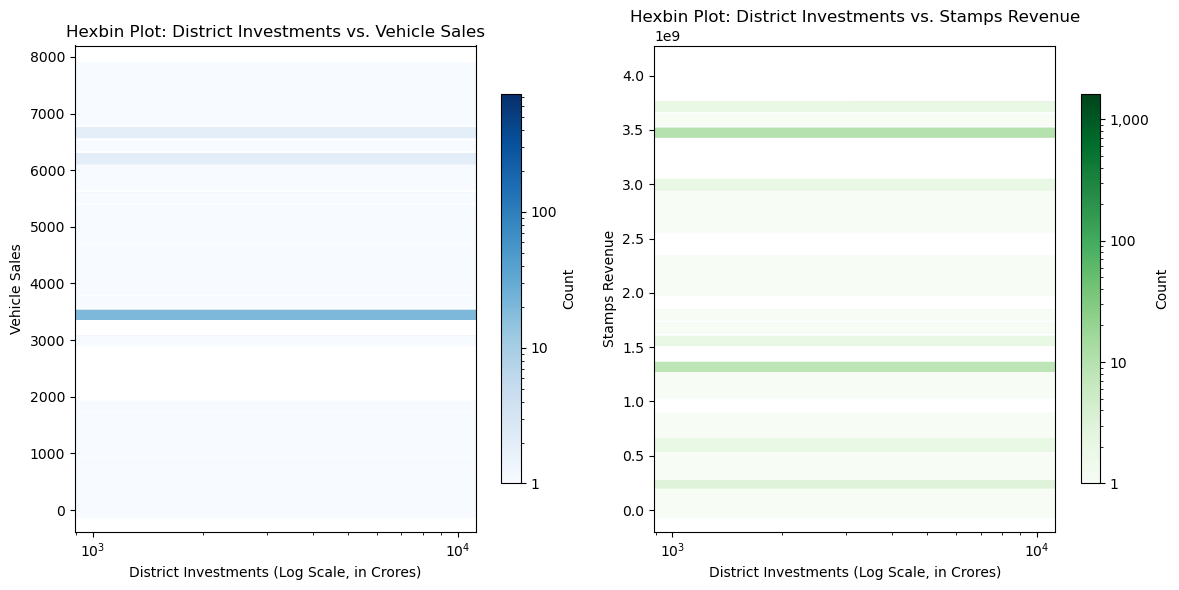

In [24]:
# Hexbin plot of district investments vs. vehicle sales
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
hb1 = plt.hexbin(x=merged_df['investment in cr'], y=merged_df['vehicleClass_MotorCar'], gridsize=30, cmap='Blues', bins='log')
plt.colorbar(hb1, label='Count', format=ticker.FuncFormatter(formatter), shrink=0.8)
plt.xscale('log')
plt.xlabel('District Investments (Log Scale, in Crores)')
plt.ylabel('Vehicle Sales')
plt.title('Hexbin Plot: District Investments vs. Vehicle Sales')

# Hexbin plot of district investments vs. stamps revenue
plt.subplot(1, 2, 2)
hb2 = plt.hexbin(x=merged_df['investment in cr'], y=merged_df['documents_registered_rev'], gridsize=30, cmap='Greens', bins='log')
plt.colorbar(hb2, label='Count', format=ticker.FuncFormatter(formatter), shrink=0.8)
plt.xscale('log')
plt.xlabel('District Investments (Log Scale, in Crores)')
plt.ylabel('Stamps Revenue')
plt.title('Hexbin Plot: District Investments vs. Stamps Revenue')

plt.tight_layout()
plt.show()
